## **Project Details**

**Project**: Cardio Good Fitness

**Date Created**: 01 March 2023

**Problem Statement**: Explore the customer dataset to identify insights for each product and provide recommendations.

**Created By**: Satya Rellu

# **Final Observations from the data Analysis**

**The customers who have one or more of the following features matching their profile inputs have more probability to buy a Threadmill**

1.   Having a moderate fitness rating and are in the Age of 23 to 27
2.   Targetting to hit upto 125 miles on the threadmill
3.   Have an Education of 14 to 17 years.
4.   Target using the Threadmill 2 to 4 times a week.

**Summary of Business Insights**

- **TM195** and **TM498** could be advised to the customers more often as the popular choices.
- Customers who target more miles on threadmill and have a self-rated fitness above 3 can be targeted.
- Customers with an education of less than 14 years or greater than 17 years and have an income below 50,000 must be educated more on the use of Threadmills to boost sales.

**Key Observations**
- The key factors that influence a product are Age, Income, and Education.
- The age groups of 20 to 30 for Singles and 25 to 35 for Partnered utilize atleast one of the products.
- Higher income individuals (>60,000) tend to prefer the TM798 variant while the others prefer either of the remaining.
- As the age increases, the target miles tend to decrease and so is the Fitness level entries.


# **Importing Dataset and Python Packages**

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#from google.colab import drive
#drive.mount('/content/drive')

#Reading the Target Dataset for analysis
#cgf = pd.read_csv("/content/drive/My Drive/CardioGoodFitnessProject.csv")
cgf=pd.read_csv('CardioGoodFitness.csv')

# **Verifying the Dataset**

In [ ]:
#First 5 rows
cgf.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [ ]:
#Rows and Columns
cgf.shape

(180, 9)

In [ ]:
#Checking 5 random entries
cgf.sample(5)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
155,TM798,25,Male,18,Partnered,6,5,75946,240
9,TM195,21,Female,15,Partnered,2,3,37521,85
132,TM498,37,Female,16,Partnered,2,3,48891,85
14,TM195,23,Male,16,Partnered,3,1,38658,47
96,TM498,24,Female,16,Single,3,3,50028,106


In [ ]:
#Randomly checking the 100th Entry out of the 180 rows
cgf.iloc[99]

Product              TM498
Age                     25
Gender                Male
Education               16
MaritalStatus    Partnered
Usage                    2
Fitness                  2
Income               52302
Miles                   42
Name: 99, dtype: object

In [ ]:
#Glimpse of the dataset
cgf.info

<bound method DataFrame.info of     Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  \
0     TM195   18    Male         14        Single      3        4   29562   
1     TM195   19    Male         15        Single      2        3   31836   
2     TM195   19  Female         14     Partnered      4        3   30699   
3     TM195   19    Male         12        Single      3        3   32973   
4     TM195   20    Male         13     Partnered      4        2   35247   
..      ...  ...     ...        ...           ...    ...      ...     ...   
175   TM798   40    Male         21        Single      6        5   83416   
176   TM798   42    Male         18        Single      5        4   89641   
177   TM798   45    Male         16        Single      5        5   90886   
178   TM798   47    Male         18     Partnered      4        5  104581   
179   TM798   48    Male         18     Partnered      4        5   95508   

     Miles  
0      112  
1       75  
2   

**Factors from the Dataset**

1.   **Product** = The model no. of the treadmill
2.   **Age** = Age of the customer in no of years
3.   **Gender** = Gender of the customer
4.   **Education** = Education of the customer in no. of years
5.   **Martial Status** = Marital status of the customer
6.   **Usage** = No. of times customer wants to use the treadmill / week
7.   **Fitness** = Self rated fitness score of the customer
                   (5 - very fit, 1 - very unfit)
8.   **Income** = Income of the customer
9.   **Miles** = Miles that a customer expects to run



In [ ]:
#Statistical description of the dataset
cgf.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product,180,3,TM195,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,180.0,NaN,NaN,NaN,28.788889,6.943498,18.0,24.0,26.0,33.0,50.0
Gender,180,2,Male,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,180.0,NaN,NaN,NaN,15.572222,1.617055,12.0,14.0,16.0,16.0,21.0
MaritalStatus,180,2,Partnered,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Usage,180.0,NaN,NaN,NaN,3.455556,1.084797,2.0,3.0,3.0,4.0,7.0
Fitness,180.0,NaN,NaN,NaN,3.311111,0.958869,1.0,3.0,3.0,4.0,5.0
Income,180.0,NaN,NaN,NaN,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.0,104581.0
Miles,180.0,NaN,NaN,NaN,103.194444,51.863605,21.0,66.0,94.0,114.75,360.0


From the above description, the following can be infered.

1. Age Group of customers = 18 to 50
2. Every customer had a minimum of 12 years of education while a few had upto 21 years of education.
3. Usage per week = 2 to 7 times
4. Income Range = 16K to 104K
5. Target Miles = 21 to 360

In [ ]:
#Missing Value treatment
cgf.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

The dataset is clean and has no Null or Invalid values. The Sanity check (EDA is successful.

In [ ]:
#All possible values for Product column
cgf['Product'].unique()

array(['TM195', 'TM498', 'TM798'], dtype=object)

In [ ]:
#All possible values for Marital Status column
cgf['MaritalStatus'].unique()

array(['Single', 'Partnered'], dtype=object)

In [ ]:
#All possible values for Gender column
cgf['Gender'].unique()

array(['Male', 'Female'], dtype=object)

The above are the unique values for the Non-Numeric columns

## **Exploratory Data Analysis**

# **Univariate Analysis**

<AxesSubplot:xlabel='Product', ylabel='Count'>

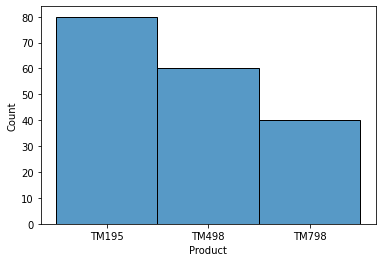

In [ ]:
sns.histplot(data=cgf, x='Product')                 #Number of customers purchasing each product

**Business Insight**

TM195 is the most popular product while TM798 is the least popular.

<AxesSubplot:xlabel='Age', ylabel='Count'>

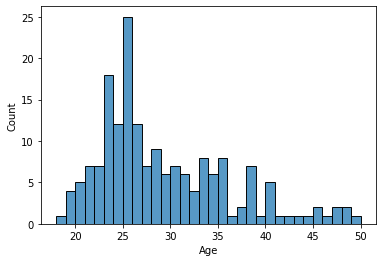

In [ ]:
sns.histplot(data=cgf, x='Age', bins = 32)            #Age distribution of the customer base

**Business Insight**

Age group of 23 to 27 has the highest purchases

<AxesSubplot:xlabel='Gender', ylabel='Count'>

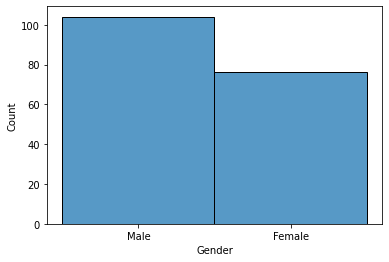

In [ ]:
sns.histplot(data=cgf, x='Gender')                    #Number of Males and Females from the customer base

**Business Insight**

Males tend to get a threadmill slightly more than Females

<AxesSubplot:xlabel='Education', ylabel='Count'>

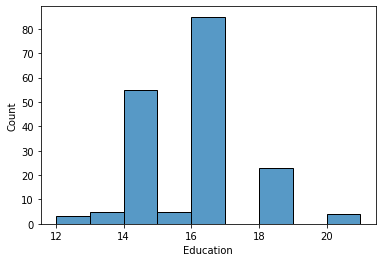

In [ ]:
sns.histplot(data=cgf, x='Education', bins = 9)       #Number of years of Education obtained

**Business Insight**

Highest Purchasing group = 14 to 17
Least purchasing group = <14 and >17


<AxesSubplot:xlabel='MaritalStatus', ylabel='Count'>

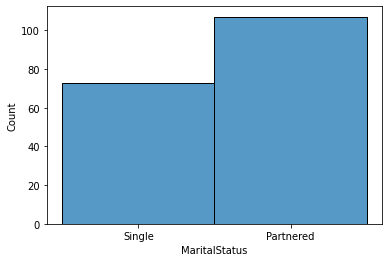

In [ ]:
sns.histplot(data=cgf, x='MaritalStatus')              #Marital Status Classified

**Business Insight**

Partnered customers are more likely to workout with Threadmills than Singles.

<AxesSubplot:xlabel='Usage', ylabel='Count'>

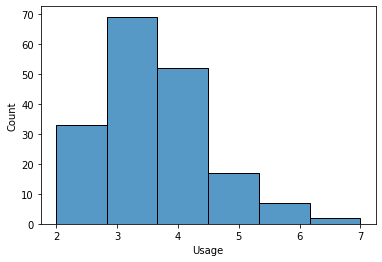

In [ ]:
sns.histplot(data=cgf, x='Usage', bins = 6)             #Target usage frequency per week

**Business Insight**

Most customers target to be 2 to 4 times a week indicating average usage.

<AxesSubplot:xlabel='Fitness', ylabel='Count'>

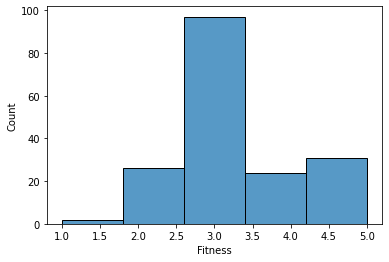

In [ ]:
sns.histplot(data=cgf, x='Fitness', bins = 5)           #Self-Rated Fitness Level by the customer

**Business Insight**

Most of the customers self-rated themselves at 3 in terms of fitness meaning, they are neither fit, nor out of shape.

<AxesSubplot:xlabel='Income', ylabel='Count'>

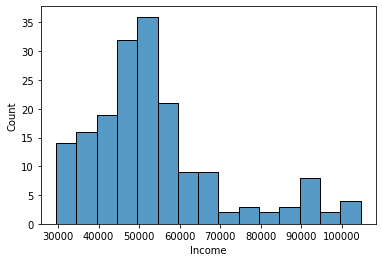

In [ ]:
sns.histplot(data=cgf, x='Income')                    #Distribution of the Income Levels of the customers

**Business Insight**

Customers in the range of 45K to 60K income are more buying one of the products while those earning more than 70K are relatively lesser.

<AxesSubplot:xlabel='Miles', ylabel='Count'>

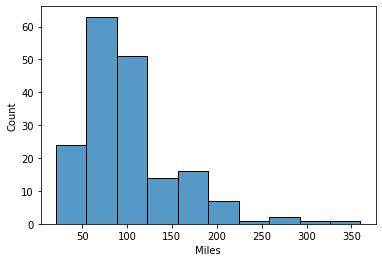

In [ ]:
sns.histplot(data=cgf, x='Miles', bins = 10)          #Target distance to cover on Threadmill aspired by the customers

**Business Insight**

Most of the customers target a range of 50 to 125 miles per week while only a handful try to hit 200 miles or above.

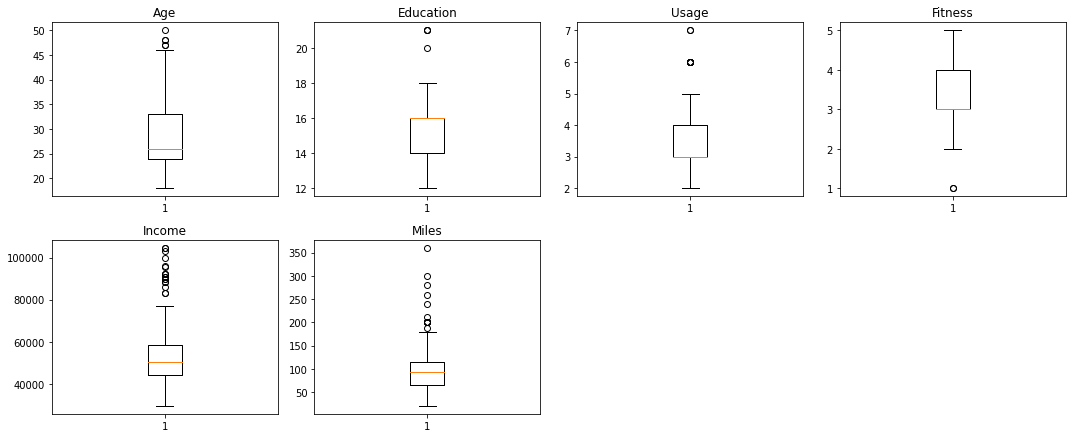

In [ ]:
# outlier detection using boxplot
# selecting the numerical columns of data and adding their names in a list
numeric_columns = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(cgf[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

# **Multivariate Analysis**

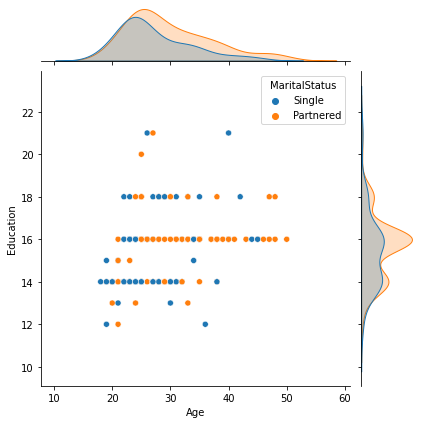

In [ ]:
sns.jointplot(data=cgf, x='Age', y='Education', hue = 'MaritalStatus'); #Distribution of Education and Age over Marital Status

The above graph indicates the correlation between Marital status with Age and Education level of the customers.



1.   Majority of the "Partnered" customers have about 16 years of education.
2.   Majority of the "Single" customers have about 14 to 18 years of education distributed in the range.



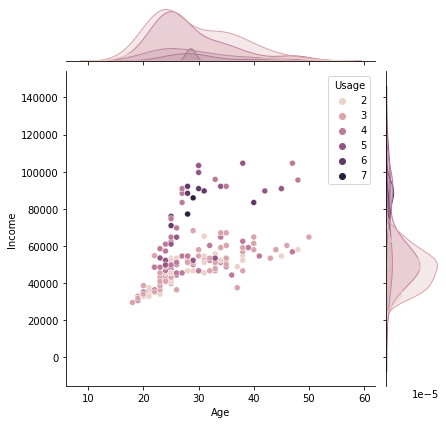

In [ ]:
sns.jointplot(data=cgf, x='Age', y='Income', hue = 'Usage');    #Distribution of Age and Income over Usage target

The above graph is used to draw a correlation between the Income level and the Usage per week.



1.   The customers with lower income range of below 60,000 used the treadmills only for less than 4 times and higher income can be correlated for more frequent usage of the treadmill.
2.   Irrespective of the usage per week, the customers who can afford a threadmill of higher expense, based on the income level, are mostly of age 20 to 30.



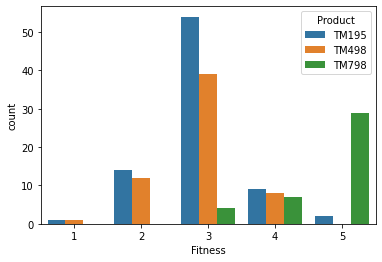

In [ ]:
sns.countplot(data=cgf, x='Fitness', hue='Product');      #Number of observations of fitness levels classified over different products

**Business Insight**

The usage of TM195 and TM498 is the maximum for customers with self-rated fitness of 3 and lower.

For customer who are fit, tend to prefer TM798.



1.   Males: Usage more than 4 times a week with a better fitness level can also be attributed for higher income levels.
2.   Females: The highest income levels have moderate fitness level and target to use the threadmill about 3 or 4 times a week.



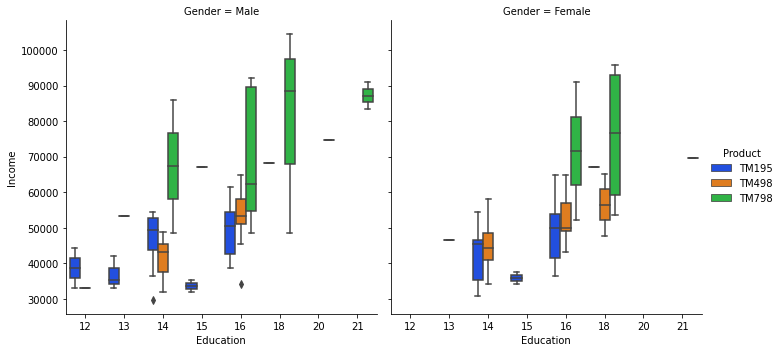

In [ ]:
#Distribution of Education and Income over different Product and Gender
sns.catplot(data=cgf, x="Education", y="Income", hue = 'Product', col="Gender", kind='box', palette='bright');

*   Education in years and fitness levels are being proportional with the income levels.




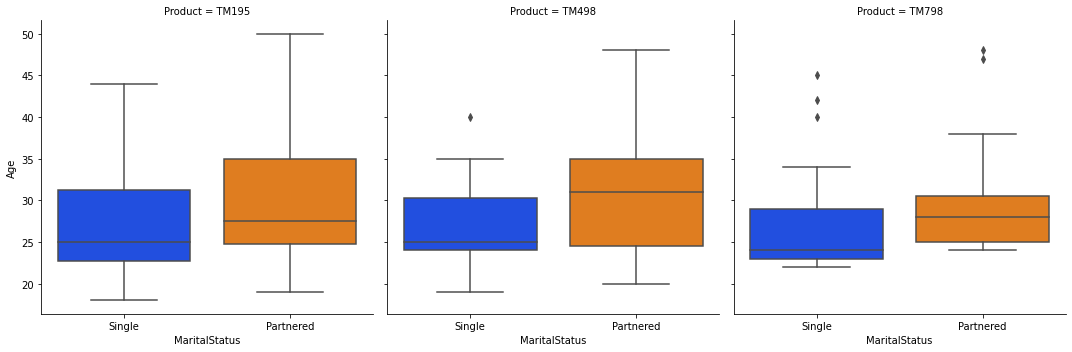

In [ ]:
#Distribution of Marital Status and Age over Product
sns.catplot(data=cgf, x="MaritalStatus", y="Age", col="Product", kind='box', palette='bright');

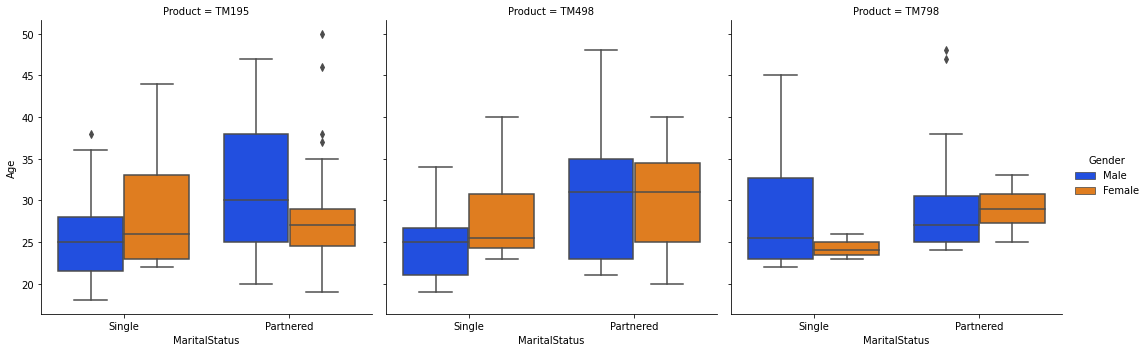

In [ ]:
#Distribution of Marital Status and Age over Gender for each Product
sns.catplot(data=cgf, x="MaritalStatus", y="Age", hue = 'Gender', col="Product", kind='box', palette='bright');

**Business Insight**

The age groups of 20 to 30 for Singles and 25 to 35 for Partnered utilize atleast one of the products.

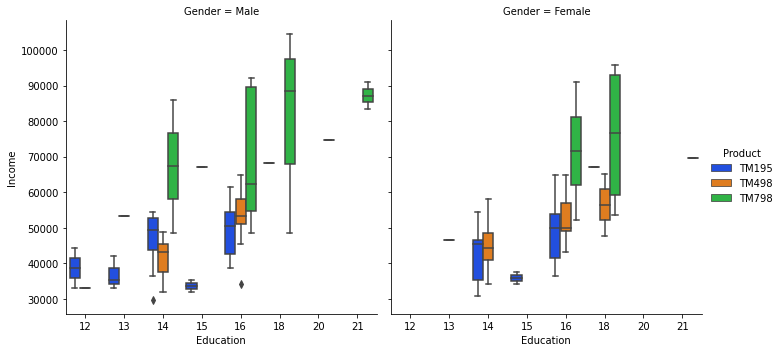

In [ ]:
#Education and Income over each Product for different Genders
sns.catplot(data=cgf, x="Education", y="Income", hue="Product", col="Gender", kind='box', palette='bright');

**Business Insight**

Higher income individuals (>60,000) tend to prefer the TM798 variant while the others prefer either of the remaining.

In [ ]:
#Distribution of Fitness levels across Age and Miles
import plotly.express as px
scatt_age_inc = px.scatter(cgf, x='Age', y='Miles', symbol='Fitness')
scatt_age_inc.update_traces(marker_size=10)
scatt_age_inc.show()

**Business Insight**

As the age increases, the target miles tend to decrease and so is the Fitness level entries.

In [ ]:
#Statistical Representation of Miles over different Usage targets
#Implies the miles targeted over the target usage per week
box_mil_inc = px.box(cgf, x='Usage', y='Miles', points="all")
box_mil_inc.show()

In [ ]:
#Graph showing the total income volume for each fitness level
bar_inc_usg = px.bar(cgf, x='Fitness', y='Income')
bar_inc_usg.show()

**Identifying the correlation between each of the variables using pairplots and heatmaps**

<Figure size 720x360 with 0 Axes>

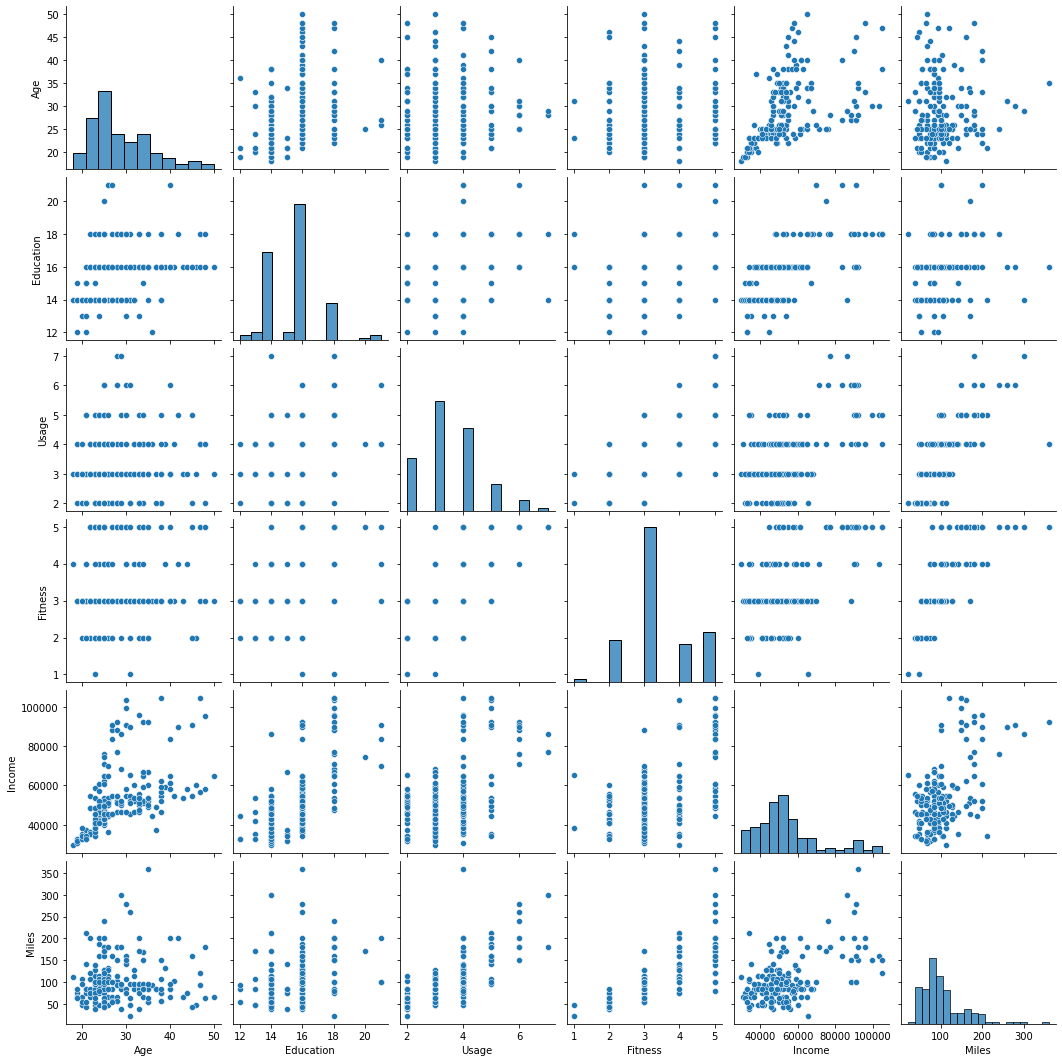

In [ ]:
#Graph showing the interaction of possible numerical factors in pairs
plt.figure(figsize = (10,5))
sns.pairplot(data=cgf[['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage', 'Fitness', 'Income', 'Miles' ]])

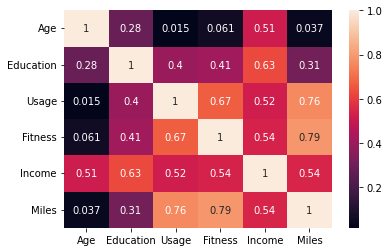

In [ ]:
#Correlation between numerical factors
sns.heatmap(data=cgf[['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage', 'Fitness', 'Income', 'Miles']].corr(), annot = True);

**EDA Observation**

Least Correlated : Age and Usage @ 0.015

Highest Correlation : Fitness and Miles @ 0.79

# plotly.graph_objects enables precise graphical representation using enhanced options
import plotly.graph_objects as go

cgf1=cgf.groupby(['Age','Education'])['Miles'].sum().reset_index()

fig=go.Figure()

# Legend is set to be 'Education'
for edu in list(set(cgf['Education'].sort_values())):
    tmp_df=cgf.loc[cgf['Education'].sort_values()==edu]
    fig.add_trace(go.Scatter(x=tmp_df.Age,y=tmp_df.Miles,mode='lines',name=edu))

fig.update_layout(xaxis_title="Age",                                            #X-Axis : 'Age'
    yaxis_title="Miles",                                                        #Y-Axis : Miles
    legend_title="Education",                                                   #Legend: 'Education'
    legend=dict(orientation='h',y=1.02,xanchor='right',x=1))

fig.show()